<Axes: xlabel='DATE'>

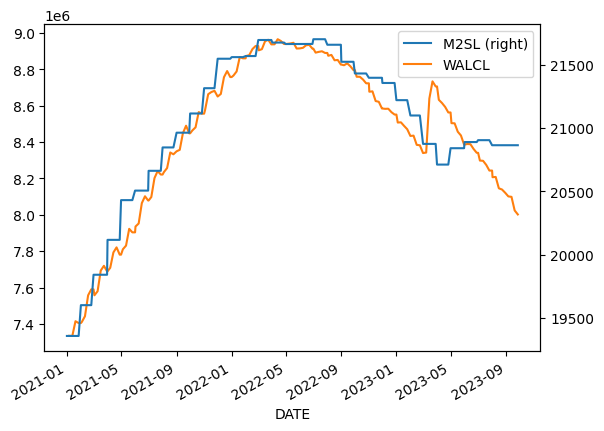

In [1]:
#유동성지표
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

data=fdr.DataReader('FRED:WALCL,M2SL',start='2021-01-01')
data.plot(secondary_y='M2SL')

In [2]:
data

,M2SL,WALCL
DATE,,
2021-01-01,19357.0,NaN
2021-01-06,19357.0,7334809.0
2021-01-13,19357.0,7333968.0
2021-01-20,19357.0,7414942.0
2021-01-27,19357.0,7404926.0
...,...,...
2023-08-30,20865.3,8121316.0
2023-09-06,20865.3,8101318.0
2023-09-13,20865.3,8098779.0


WALCL :연준의 자산 즉 연준이 은행에 준 돈
, M2SL :시중에 풀려있는돈 이라고 생각하시면 됩니다. 

SVB 파산 이후 유동성을 쫙 풀었다가 다시 23년 1월 수준으로 복귀했습니다. 연준은 아직 긴축하고 있습니다.

<Axes: xlabel='DATE'>

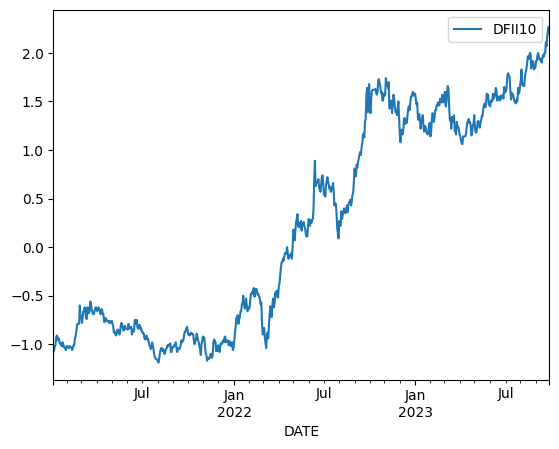

In [3]:
data=fdr.DataReader('FRED:DFII10', start='2021-01-01')
data.plot()

In [4]:
data

,DFII10
DATE,
2021-01-04,-1.08
2021-01-05,-1.07
2021-01-06,-1.02
2021-01-07,-1.01
2021-01-08,-0.93
...,...
2023-09-22,2.07
2023-09-25,2.18
2023-09-26,2.23


10년물 국채와 10년 TIPS(물가연동국채) 수익률 스프레드입니다. 인플레이션이 상승할 것이라고 생각하는 경우 TIPS의 가격이 높아져(수익률감소) 스프레드가 증가합니다.

<Axes: xlabel='DATE'>

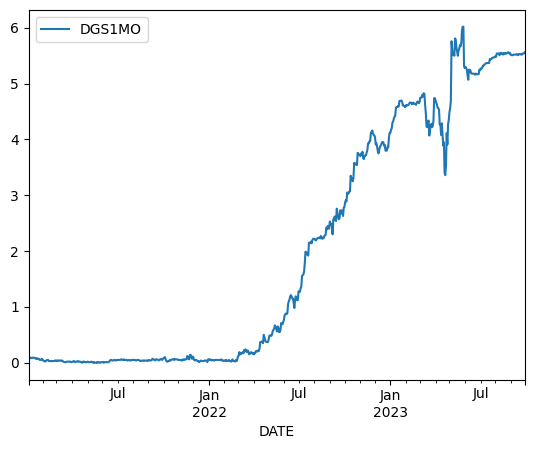

In [5]:
data=fdr.DataReader('FRED:DGS1MO',start='2021-01-01')
data.plot()

미국 1개월 국채 수익률입니다. 한 때 미국의 디폴트 우려로 크게 하락했지만 다시 복귀하는 모습입니다.

<Axes: xlabel='DATE'>

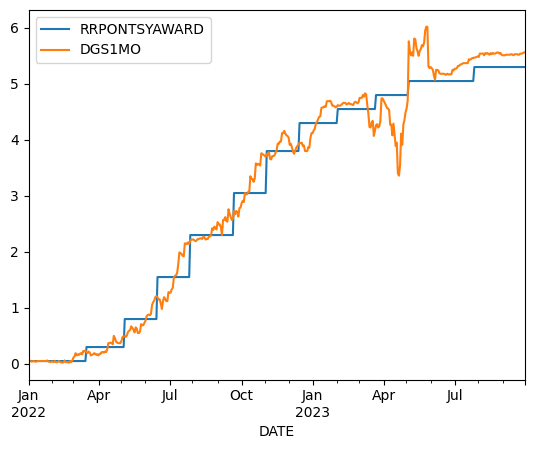

In [9]:
data=fdr.DataReader('FRED:RRPONTSYAWARD,DGS1MO',start='2022-01-01')
data.plot(secondary_y='DFF')

In [10]:
data['2023']

C:\Users\pc\AppData\Local\Temp\ipykernel_27920\1503388216.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2023']


,RRPONTSYAWARD,DGS1MO
DATE,,
2023-01-02,4.3,4.12
2023-01-03,4.3,4.17
2023-01-04,4.3,4.20
2023-01-05,4.3,4.30
2023-01-06,4.3,4.32
...,...,...
2023-09-25,5.3,5.54
2023-09-26,5.3,5.54
2023-09-27,5.3,5.54


역레포 금리와 미국 1개월 국채 수익률 비교입니다. 역레포 금리가 상승하고 시장의 자금이 채권으로 흘러들어가 미 국채 수익률 보다 역레포 금리가 위에 있다면 금융기관은 더 많은 돈을 연준에 맡기게 됩니다. 이에따라 연준의 긴축 속도가 빨라지게 됩니다. 아직은 국채 수익률이 우위에 있습니다.

이것이 역전될 경우 시장이 하락 or 조정 될 수 있습니다. 아직은 역레포 금리보다 국채수익률이 더 높아 역레포는 감소추세에 있는 것 같습니다.

In [11]:
data=fdr.DataReader('FRED:WALCL,WDTGAL,WLRRAL',start='2020-01-01')  #순서대로 자산-TGA-RRP
snp=fdr.DataReader('yfinance:^GSPC',start='2020-01-01')

In [12]:
data

,WALCL,WDTGAL,WLRRAL
DATE,,,
2020-01-01,4173626.0,403853.0,336649.0
2020-01-08,4149544.0,350840.0,274923.0
2020-01-15,4175850.0,380802.0,260913.0
2020-01-22,4145912.0,411708.0,265357.0
2020-01-29,4151630.0,450537.0,233404.0
...,...,...,...
2023-08-30,8121316.0,500702.0,1998323.0
2023-09-06,8101318.0,481552.0,1899878.0
2023-09-13,8098779.0,537364.0,1835634.0


In [13]:
liq=data['WALCL']-data['WDTGAL']-data['WLRRAL']
snp=snp.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [14]:
snpliq=pd.concat([snp,liq],axis=1)
snpliq.columns=['S&P','Liq']
snpliq['2023']

C:\Users\pc\AppData\Local\Temp\ipykernel_27920\3400714294.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  snpliq['2023']


,S&P,Liq
2023-01-03,3824.139893,NaN
2023-01-04,3852.969971,5565926.0
2023-01-05,3808.100098,NaN
2023-01-06,3895.080078,NaN
2023-01-09,3892.090088,NaN
...,...,...
2023-09-25,4337.439941,NaN
2023-09-26,4273.529785,NaN
2023-09-27,4274.509766,5574813.0
2023-09-28,4299.700195,NaN


In [15]:
pd.DataFrame(liq)

,0
DATE,
2020-01-01,3433124.0
2020-01-08,3523781.0
2020-01-15,3534135.0
2020-01-22,3468847.0
2020-01-29,3467689.0
...,...
2023-08-30,5622291.0
2023-09-06,5719888.0
2023-09-13,5725781.0


연준의 자산 - 역레포 잔고 - TGA 잔고 입니다. 본원통화 + 연준기타자산을 의미하며 증가하면 유동성 확대로 해석할 수 있습니다.

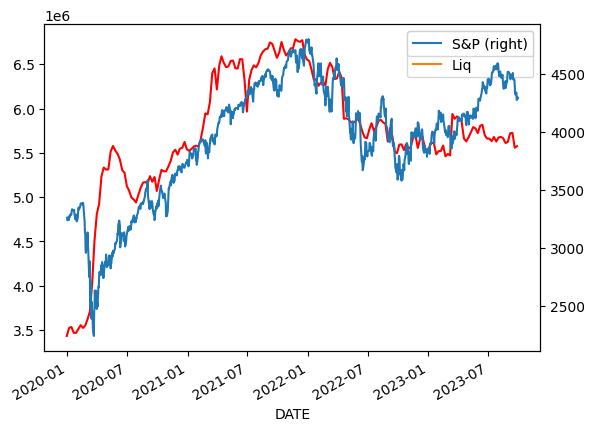

In [16]:
snpliq.plot(secondary_y='S&P')

liq.plot(color='r')
plt.legend()

최근 시장은 정부의 유동성 정책과 비슷한 움직임을 보여줍니다. 이를 통해 방향성을 확인해 볼 수 있습니다

In [18]:
data=fdr.DataReader('FRED:H41RESPPALDKNWW,WLCFLPCL,WLCFOCEL',start='2023-03-15')
data.columns=['BTFP','Primary Credit','FDIC']
data

,BTFP,Primary Credit,FDIC
DATE,,,
2023-03-15,11943.0,152853.0,142800.0
2023-03-22,53669.0,110248.0,179800.0
2023-03-29,64403.0,88157.0,180100.0
2023-04-05,79021.0,69705.0,174609.0
2023-04-12,71837.0,67633.0,172615.0
2023-04-19,73982.0,69925.0,172615.0
2023-04-26,81327.0,73855.0,170370.0
2023-05-03,75778.0,5345.0,228217.0
2023-05-10,83101.0,9323.0,212531.0


BTFP : 은행이 손실중인 미국채를 연준에 맡기며 돈을 빌려온 금액입니다. 어떤 은행인지 공개하지 않습니다. 대출이 증가하면 증가합니다.

Primary Credit : 보통 힘든 은행으로 연준이 은행에 90일 짜리로 대출해 준 금액입니다. 은행을 공개하며 낙인효과가 있습니다. 대출이 증가하면 증가합니다.

Other Credit Extentions : FDIC보증액으로 , 은행 파산 or 위기시 금융시스템 안정을 위해 사용하는 금액으로, 문제가 있는 은행에 대출을 해줬다가 은행이 인수되면 이 계정이 감소합니다(회수).

C:\Users\pc\AppData\Local\Temp\ipykernel_27920\1376142102.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data.plot(), data['2023']


(<Axes: xlabel='DATE'>,
               WSHOSHO
 DATE                 
 2023-01-04  8101500.0
 2023-01-11  8100175.0
 2023-01-18  8079010.0
 2023-01-25  8062665.0
 2023-02-01  8024470.0
 2023-02-08  8024104.0
 2023-02-15  7990467.0
 2023-02-22  7986887.0
 2023-03-01  7948534.0
 2023-03-08  7948335.0
 2023-03-15  7940014.0
 2023-03-22  7936558.0
 2023-03-29  7926131.0
 2023-04-05  7877114.0
 2023-04-12  7877741.0
 2023-04-19  7860459.0
 2023-04-26  7843852.0
 2023-05-03  7800812.0
 2023-05-10  7801273.0
 2023-05-17  7771385.0
 2023-05-24  7767733.0
 2023-05-31  7724820.0
 2023-06-07  7722405.0
 2023-06-14  7720770.0
 2023-06-21  7701409.0
 2023-06-28  7685565.0
 2023-07-05  7646946.0
 2023-07-12  7644833.0
 2023-07-19  7623441.0
 2023-07-26  7600888.0
 2023-08-02  7567931.0
 2023-08-09  7568277.0
 2023-08-16  7525905.0
 2023-08-23  7521981.0
 2023-08-30  7508057.0
 2023-09-06  7489689.0
 2023-09-13  7483696.0
 2023-09-20  7457541.0
 2023-09-27  7440211.0)

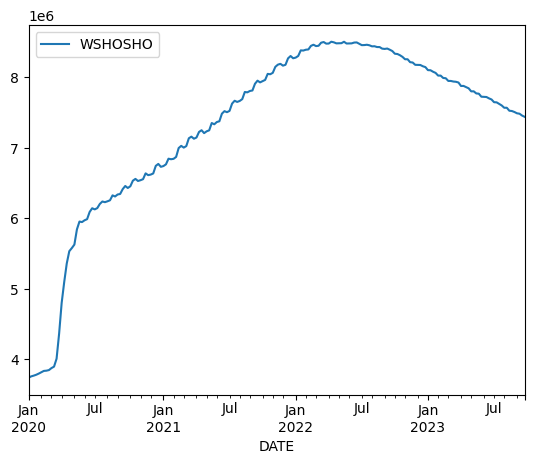

In [19]:
data=fdr.DataReader('FRED:WSHOSHO',start='2020-01-01')
data.plot(), data['2023']

연준의 유가증권(주로 국채+MBS) 보유량입니다.